In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score, recall_score
import joblib
import matplotlib.pyplot as plt


### Read Updated Dataset 

In [2]:

df = pd.read_csv('E-commerce Customer Behavior.csv')


### Data Analysis

In [3]:

df.head()


,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [4]:
df.tail()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral
349,450,Female,43,Chicago,Bronze,515.75,10,3.3,True,49,Unsatisfied


In [5]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [6]:
print(sorted(df['Gender'].unique()))
print(sorted(df['City'].unique()))
print(sorted(df['Membership Type'].unique()))
print(sorted(df['Discount Applied'].unique()))
print(sorted(df['Satisfaction Level'].unique()))

['Female', 'Male']
['Chicago', 'Houston', 'Los Angeles', 'Miami', 'New York', 'San Francisco']
['Bronze', 'Gold', 'Silver']
[False, True]
['Neutral', 'Satisfied', 'Unsatisfied']


### Data Preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        350 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [8]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [9]:

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['City'] = le.fit_transform(df['City'])
df['Membership Type'] = le.fit_transform(df['Membership Type'])
df['Discount Applied'] = le.fit_transform(df['Discount Applied'])
df['Satisfaction Level'] = le.fit_transform(df['Satisfaction Level'])

features = df[['Gender', 'Age', 'City', 'Membership Type', 'Total Spend', 'Items Purchased', 'Average Rating', 
               'Discount Applied', 'Days Since Last Purchase']]

features.head()


,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase
0,0,29,4,1,1120.20,14,4.6,1,25
1,1,34,2,2,780.50,11,4.1,0,18
2,0,43,0,0,510.75,9,3.4,1,42
3,1,30,5,1,1480.30,19,4.7,0,12
4,1,27,3,2,720.40,13,4.0,1,55


In [10]:
features

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase
0,0,29,4,1,1120.20,14,4.6,1,25
1,1,34,2,2,780.50,11,4.1,0,18
2,0,43,0,0,510.75,9,3.4,1,42
3,1,30,5,1,1480.30,19,4.7,0,12
4,1,27,3,2,720.40,13,4.0,1,55
...,...,...,...,...,...,...,...,...,...
345,1,32,3,2,660.30,10,3.8,1,42
346,0,36,1,0,470.50,8,3.0,0,27
347,0,30,4,1,1190.80,16,4.5,1,28
348,1,34,2,2,780.20,11,4.2,0,21


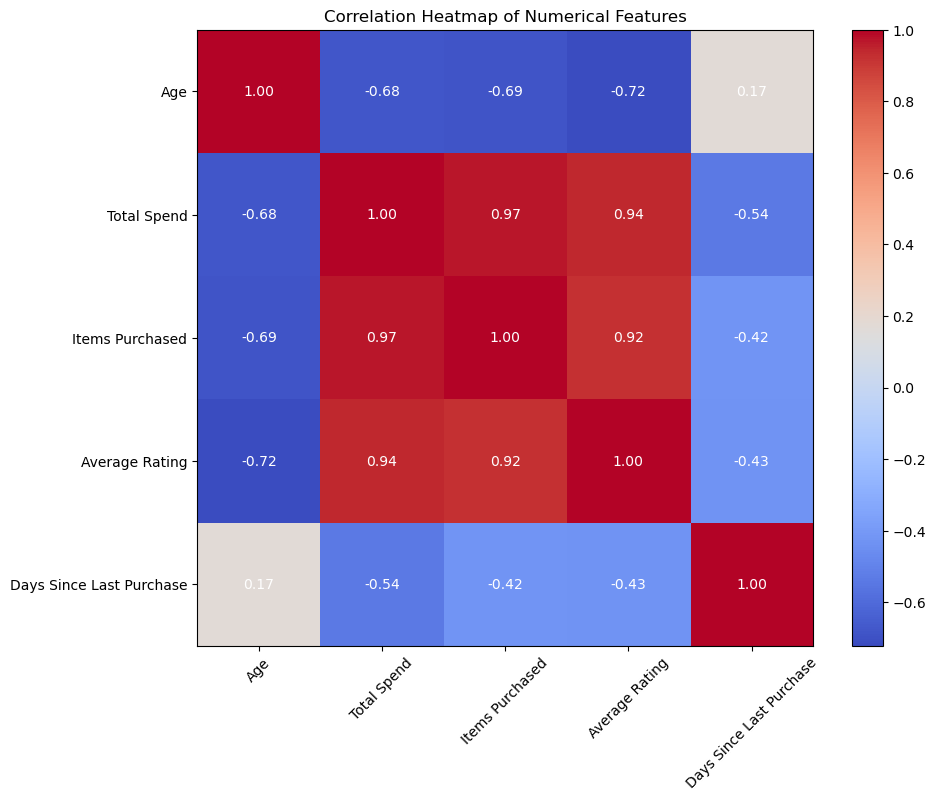

In [13]:
corr = features[['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']].corr()

plt.figure(figsize=(10, 8))
cax = plt.imshow(corr, interpolation='nearest', cmap='coolwarm')
plt.colorbar(cax)


labels = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']
plt.xticks(np.arange(len(labels)), labels, rotation=45)
plt.yticks(np.arange(len(labels)), labels)

for i in range(len(labels)):
    for j in range(len(labels)):
        text = plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                        ha="center", va="center", color="w")

plt.title('Correlation Heatmap of Numerical Features')
plt.show()


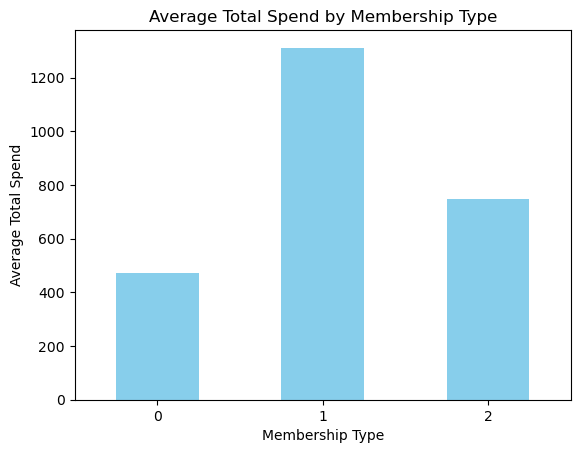

In [14]:
avg_spend_by_membership = df.groupby('Membership Type')['Total Spend'].mean()

avg_spend_by_membership.plot(kind='bar', color='skyblue')
plt.xlabel('Membership Type')
plt.ylabel('Average Total Spend')
plt.title('Average Total Spend by Membership Type')
plt.xticks(rotation=0)  
plt.show()


### Features and Labels Seperation

### Splitting Data of Features and Labels into Train and Test Sets

In [17]:

X_train, X_test = train_test_split(features, test_size=0.2, random_state=42)


### Select and Apply Unsupervised Models

### 1) DBSCAN

In [15]:
dbscan = DBSCAN(eps=10, min_samples=5)

In [18]:

dbscan.fit(X_train)

DBSCAN(eps=10)

In [19]:
# Get cluster labels assigned by DBSCAN
train_cluster_labels = dbscan.labels_
print("Cluster labels for training data:", train_cluster_labels)

Cluster labels for training data: [ 0  1  2  3  4  5  0  6  7  8  9 10 11  8  8  2 10 11 -1  0 11  7  6 12
  6  6  9  4 13  8 14  0  8  8  9  9  9  6  4  6  6  6 15 -1 16  1 11  4
  6 15 17 11  7 11  0 -1 10 -1  6 18 -1  6  6 11 16 19  3  0 17  4  6 11
  6  4  8 20  0 11  6  8  0 14  6  0 20  6  8  6 15  6  6 -1 11 -1 11  8
 -1  8 11 11  6 10 20 11 20 11  3 11 10  9  6  7  6  4  9 20 19  6  0  6
  6  8  2  8  4 11  0  6  6 17  8 11 10  6  6  0 20 -1  6 13  8 13  0 14
  3 11  5  8 18  6 20  1  1  8 15 11  8  7 16  9 -1  8 17 13 -1 16  6  0
 11 20 -1 -1 20  2 12  3  8  2  0 11 19  0 11  6  4 14 15 10  6 -1  5 11
  2 11 11  2 10  1  6 11  6  6 19  6 12  3 11 11  0 20 -1 -1 11  0 -1  7
  6 12 -1 17  0  6 18  6 11  8  9  9  6  6 19  5 15 20  9  6  0 18 13 19
  6  6  0  5 -1 12  6 12 11  2  0  0 18  1  6  9 11  6 18 -1 17 12  4 11
 10  3  9 11 11  0  8 15  6  6  6  8 16  0  9 14]


In [20]:
dbscan_labels = dbscan.fit_predict(X_test)
print("\nDBSCAN Evaluation:")
print(dbscan_labels)


DBSCAN Evaluation:
[-1 -1 -1 -1  0 -1  0 -1 -1  0 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [42]:
silhouette_avg = silhouette_score(X_test, dbscan_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.09254292396555594


### 2) Hierarchical Clustering

In [23]:

hierarchical = AgglomerativeClustering(n_clusters=3)

In [24]:

hierarchical.fit(X_train)

AgglomerativeClustering(n_clusters=3)

In [25]:
hierarchical_labels = hierarchical.fit_predict(X_test)

In [44]:

# Evaluation for Hierarchical Clustering
hierarchical_labels = hierarchical.fit_predict(X_test)
print("\nHierarchical Clustering Evaluation:")
print("Score:", silhouette_score(X_test, hierarchical_labels))


Hierarchical Clustering Evaluation:
Score: 0.7389726454874955


### 3) K-Means Clustering

In [29]:

kmeans = KMeans(n_clusters=3, random_state=42)


#### Train Model

In [30]:

kmeans.fit(X_train)

/Users/tanuja/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

#### Models Evaluation

In [45]:

# Evaluation for KMeans
kmeans_labels = kmeans.predict(X_test)
print("KMeans Evaluation:")
print("Score:", silhouette_score(X_test, kmeans_labels))


KMeans Evaluation:
Score: 0.7389726454874955


### Comparison Graph

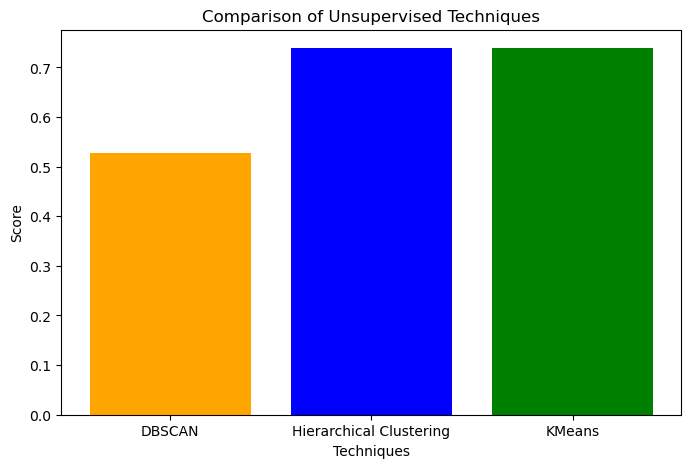

In [46]:

DBSCAN_silhouette= silhouette_score(X_train, train_cluster_labels)
hierarchical_silhouette = silhouette_score(X_test, hierarchical_labels)
kmeans_silhouette = silhouette_score(X_test, kmeans_labels)
techniques = ['DBSCAN', 'Hierarchical Clustering', 'KMeans']
accuracies = [DBSCAN_silhouette, hierarchical_silhouette, kmeans_silhouette]

plt.figure(figsize=(8, 5))
plt.bar(techniques, accuracies, color=['orange', 'blue', 'green'])
plt.xlabel('Techniques')
plt.ylabel('Score')
plt.title('Comparison of Unsupervised Techniques')
# plt.ylim(0, 2)  
plt.show()
